# Introduction
In this project I'll use linear regression to predict housing prices according to a 7 year old dataset from a California distrinct and a 1990 census.
Dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices

## Importing Librarias and Data Exploration

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('./data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In this general view of some of the data, we can see that the objects in the 'ocean_proximity' column are strings.

In [45]:
data['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

Because of this, we'll have to encode these values so that they fit in a linear regression model.

We can also see that there are some values missing in the 'total_bedrooms' column.

In [46]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Since the proportion of rows that contain null values is small compared to the total amount of rows, I'm going to decide to drop these entries. In other cases, it would be appropriate to use other 'Imputation methods' or approaches.

In [47]:
data.dropna(inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Since we're going to predict housing prices, we'll choose the 'median_house_value' column as our dependent variable (target), and the rest as the independent variables.

<AxesSubplot: >

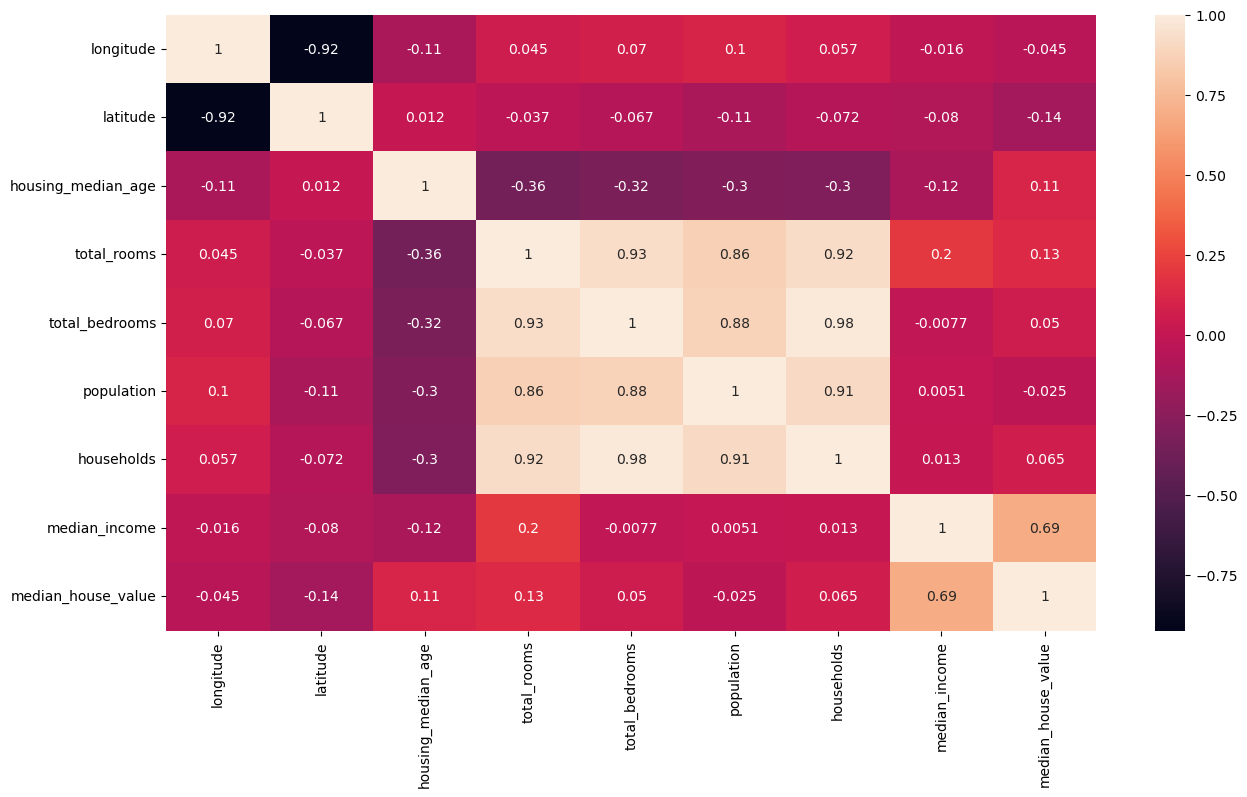

In [48]:
plt.figure(figsize=(15,8))
# let's remove the ocean proximity column for a while
sns.heatmap(data.drop('ocean_proximity', axis=1).corr(), annot=True)


We can see that the median income has a lot of influence on the median house value. This shows that the median income is a good predictor of the median house value.

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

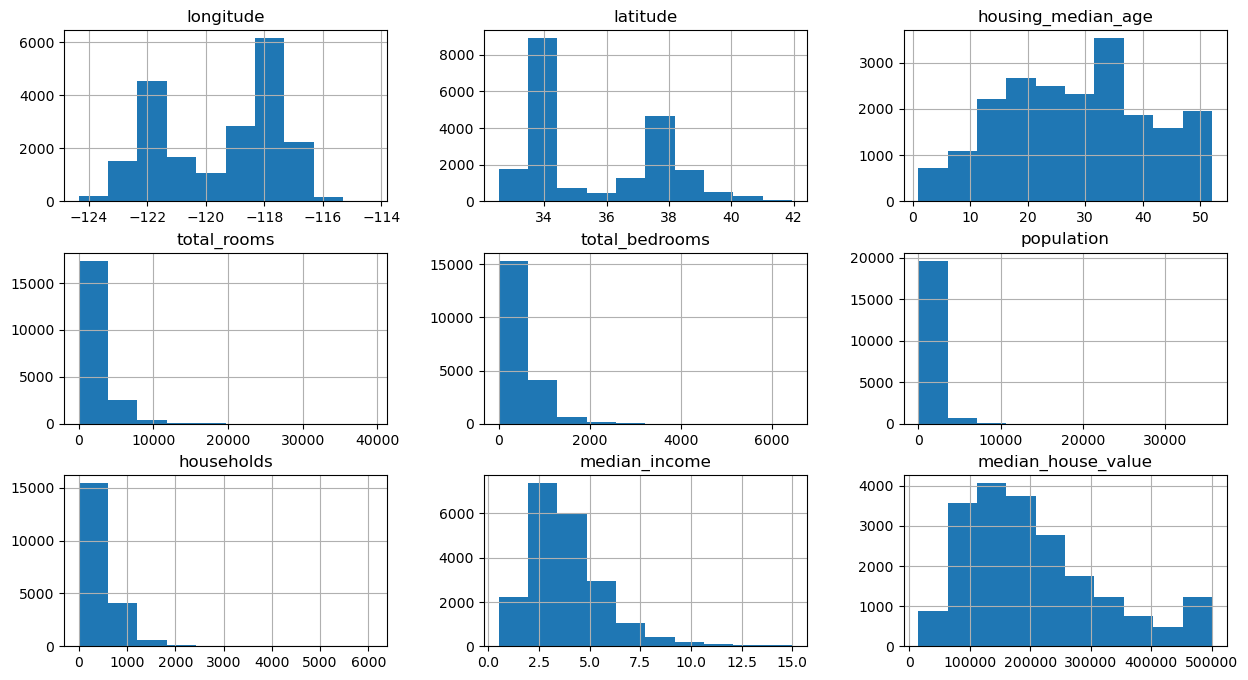

In [49]:
data.hist(figsize=(15,8))

Here we can see that there are a lot of right skewed figures. That means that the variables total_rooms, total_bedrooms, population, households, median_income need to be transformed since their data is not symmetrically distributed, which in this case is desirable since we don't want outliers to affect the accuracy of our predictions.

## Data preprocessing
In order to transform the right skewed variables, we will apply the log transformation to each one of them.

In [50]:
data['total_rooms'] = np.log(data['total_rooms'])+1
data['total_bedrooms'] = np.log(data['total_bedrooms'])+1
data['population'] = np.log(data['population'])+1
data['households'] = np.log(data['households'])+1
data['median_income'] = np.log(data['median_income'])+1

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

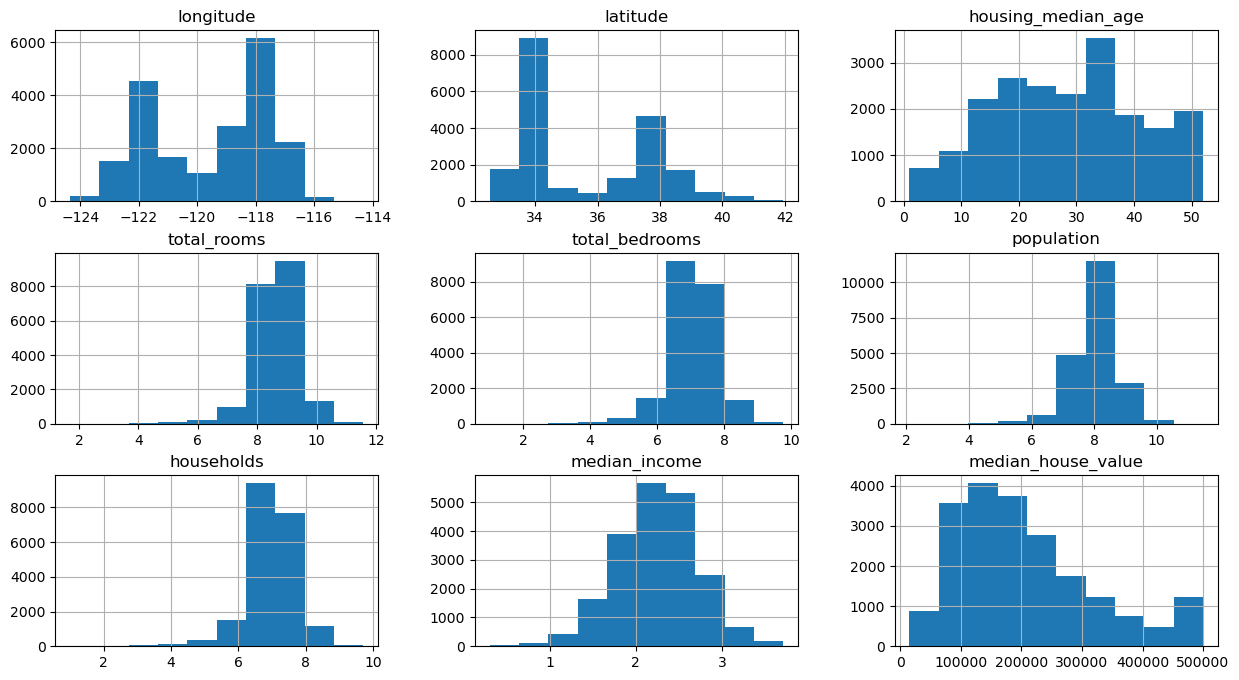

In [51]:
data.hist(figsize=(15,8))

Now, since ocean_proximity values are of type string, we need to encode each value into a binary value, using one-hot encoding.

In [52]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

We can use the functions in sklearn, but in this case we'll use Pandas:

In [53]:
data = data.join(pd.get_dummies(data['ocean_proximity']).astype(int)).drop('ocean_proximity', axis=1)

Let's see how the transformed features correlate with the target variable.

<AxesSubplot: >

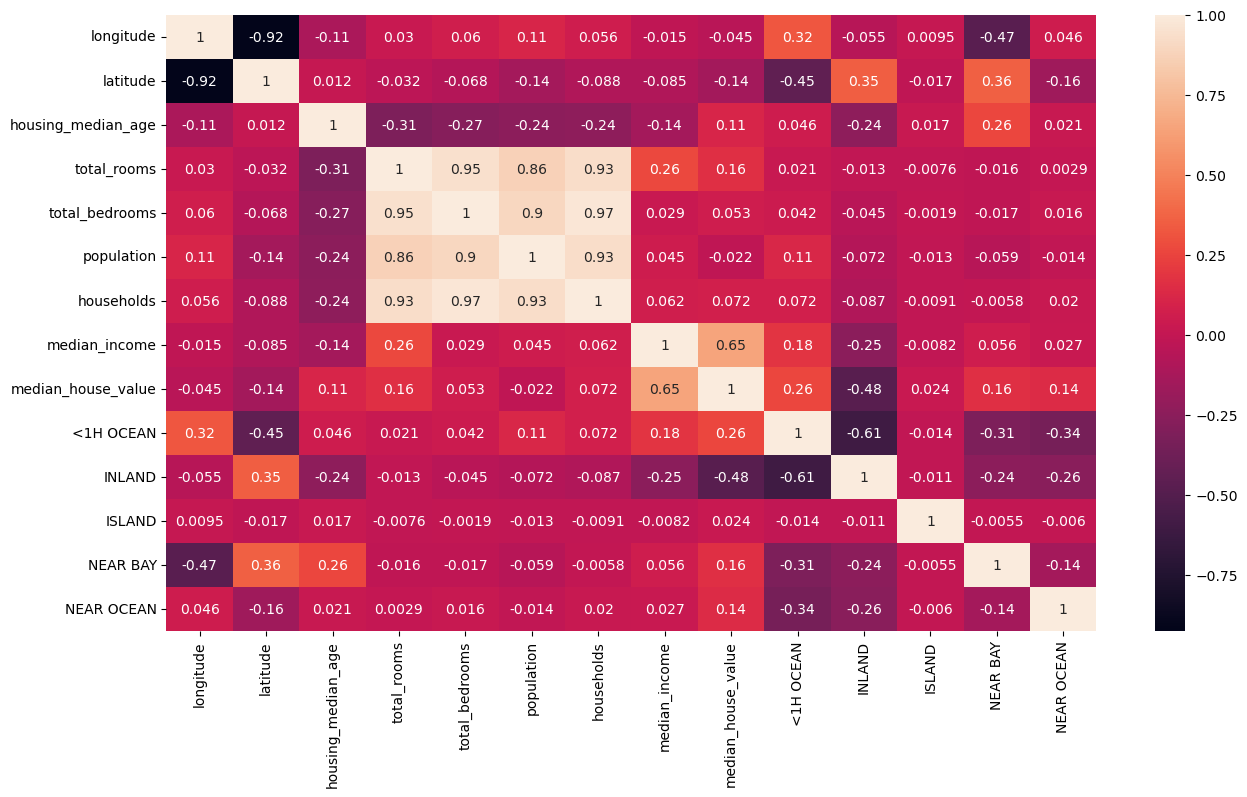

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

We can see that the median house value greatly varies depending on if the house is inland or nearer the ocean. We can better see this in the following visual:

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

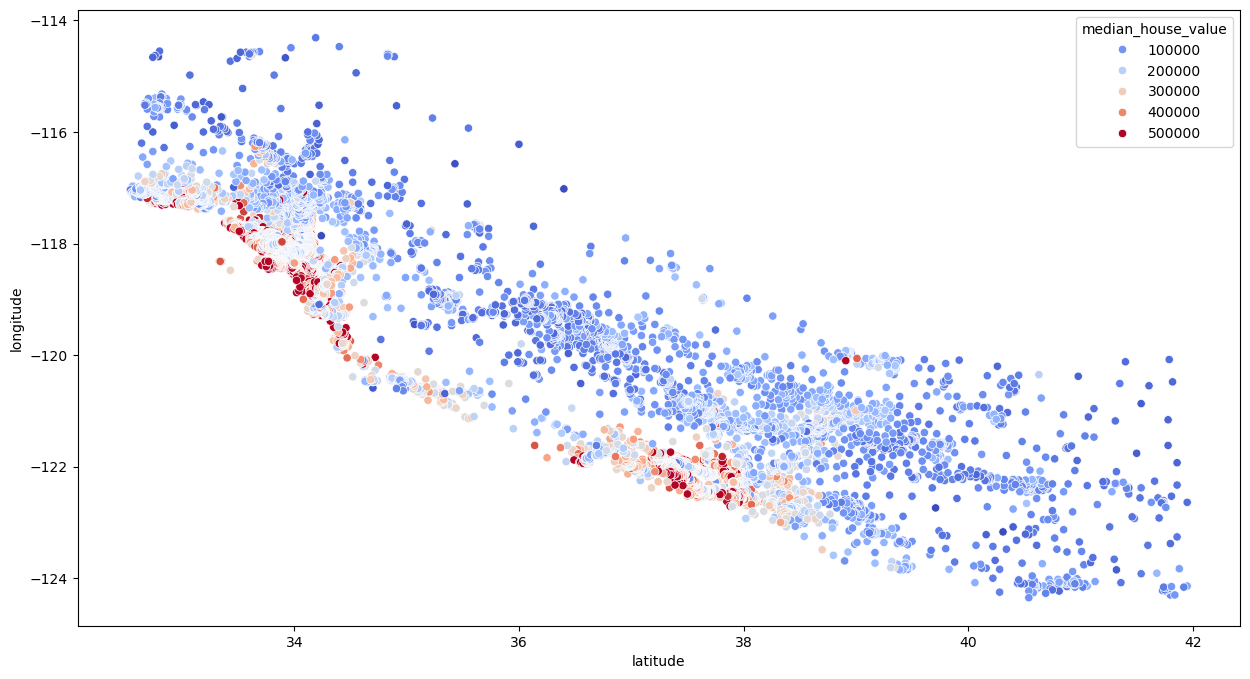

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue='median_house_value', palette='coolwarm')

Here we can better see that houses closer to the coast (the ones red-coloured) have a higher value than the other.

## Feature Engineering

In [56]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

We can create new variables using the data that we already have. For example, we could ask:
- Does the amount of people living in the same block influence the median house price?
- Does the amount of rooms in a house influence the median house price?


Let's see:

In [57]:
data['room_per_household'] = data['total_rooms']/data['households']
data['population_per_household'] = data['population']/data['households']

<AxesSubplot: >

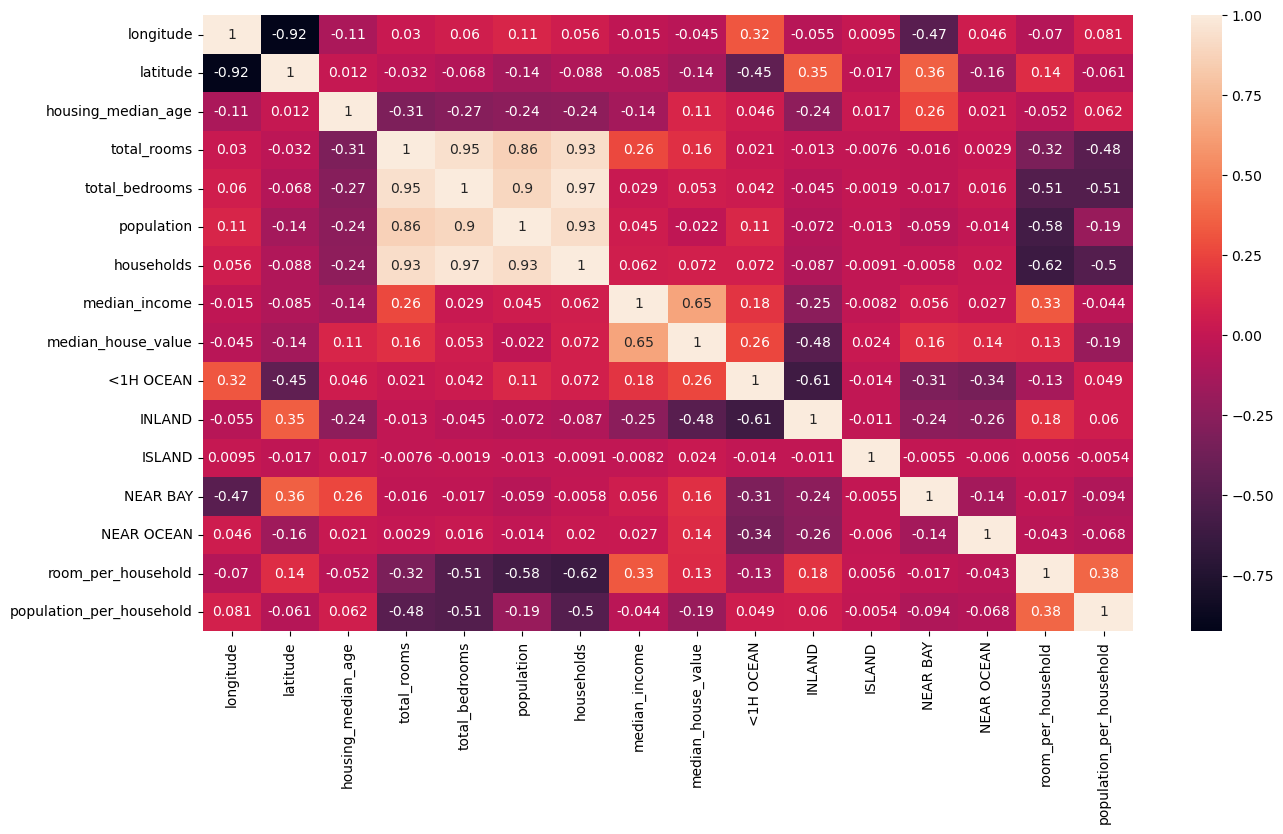

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

Even though the influence on each of the variables is not as big, according to the heatmap, we can assume that:
- The more rooms in a house, the more pricey a house will be.
- The more people living in the same block, the cheaper the house will be.

## Linear regression model

In [59]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [60]:
from sklearn.model_selection import train_test_split
# we will import test_train_split from sklearn
# we will split the data into 80% training and 20% testing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)
    

LinearRegression()

In [62]:
model.score(X_test, y_test)

0.6071794539025703

We can see that 0.62.. is not a very good score. This may be because we haven't done feature scaling, therefore, some variables may be "stronger" than others. Let's scale the variables and see how our model's performance works.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


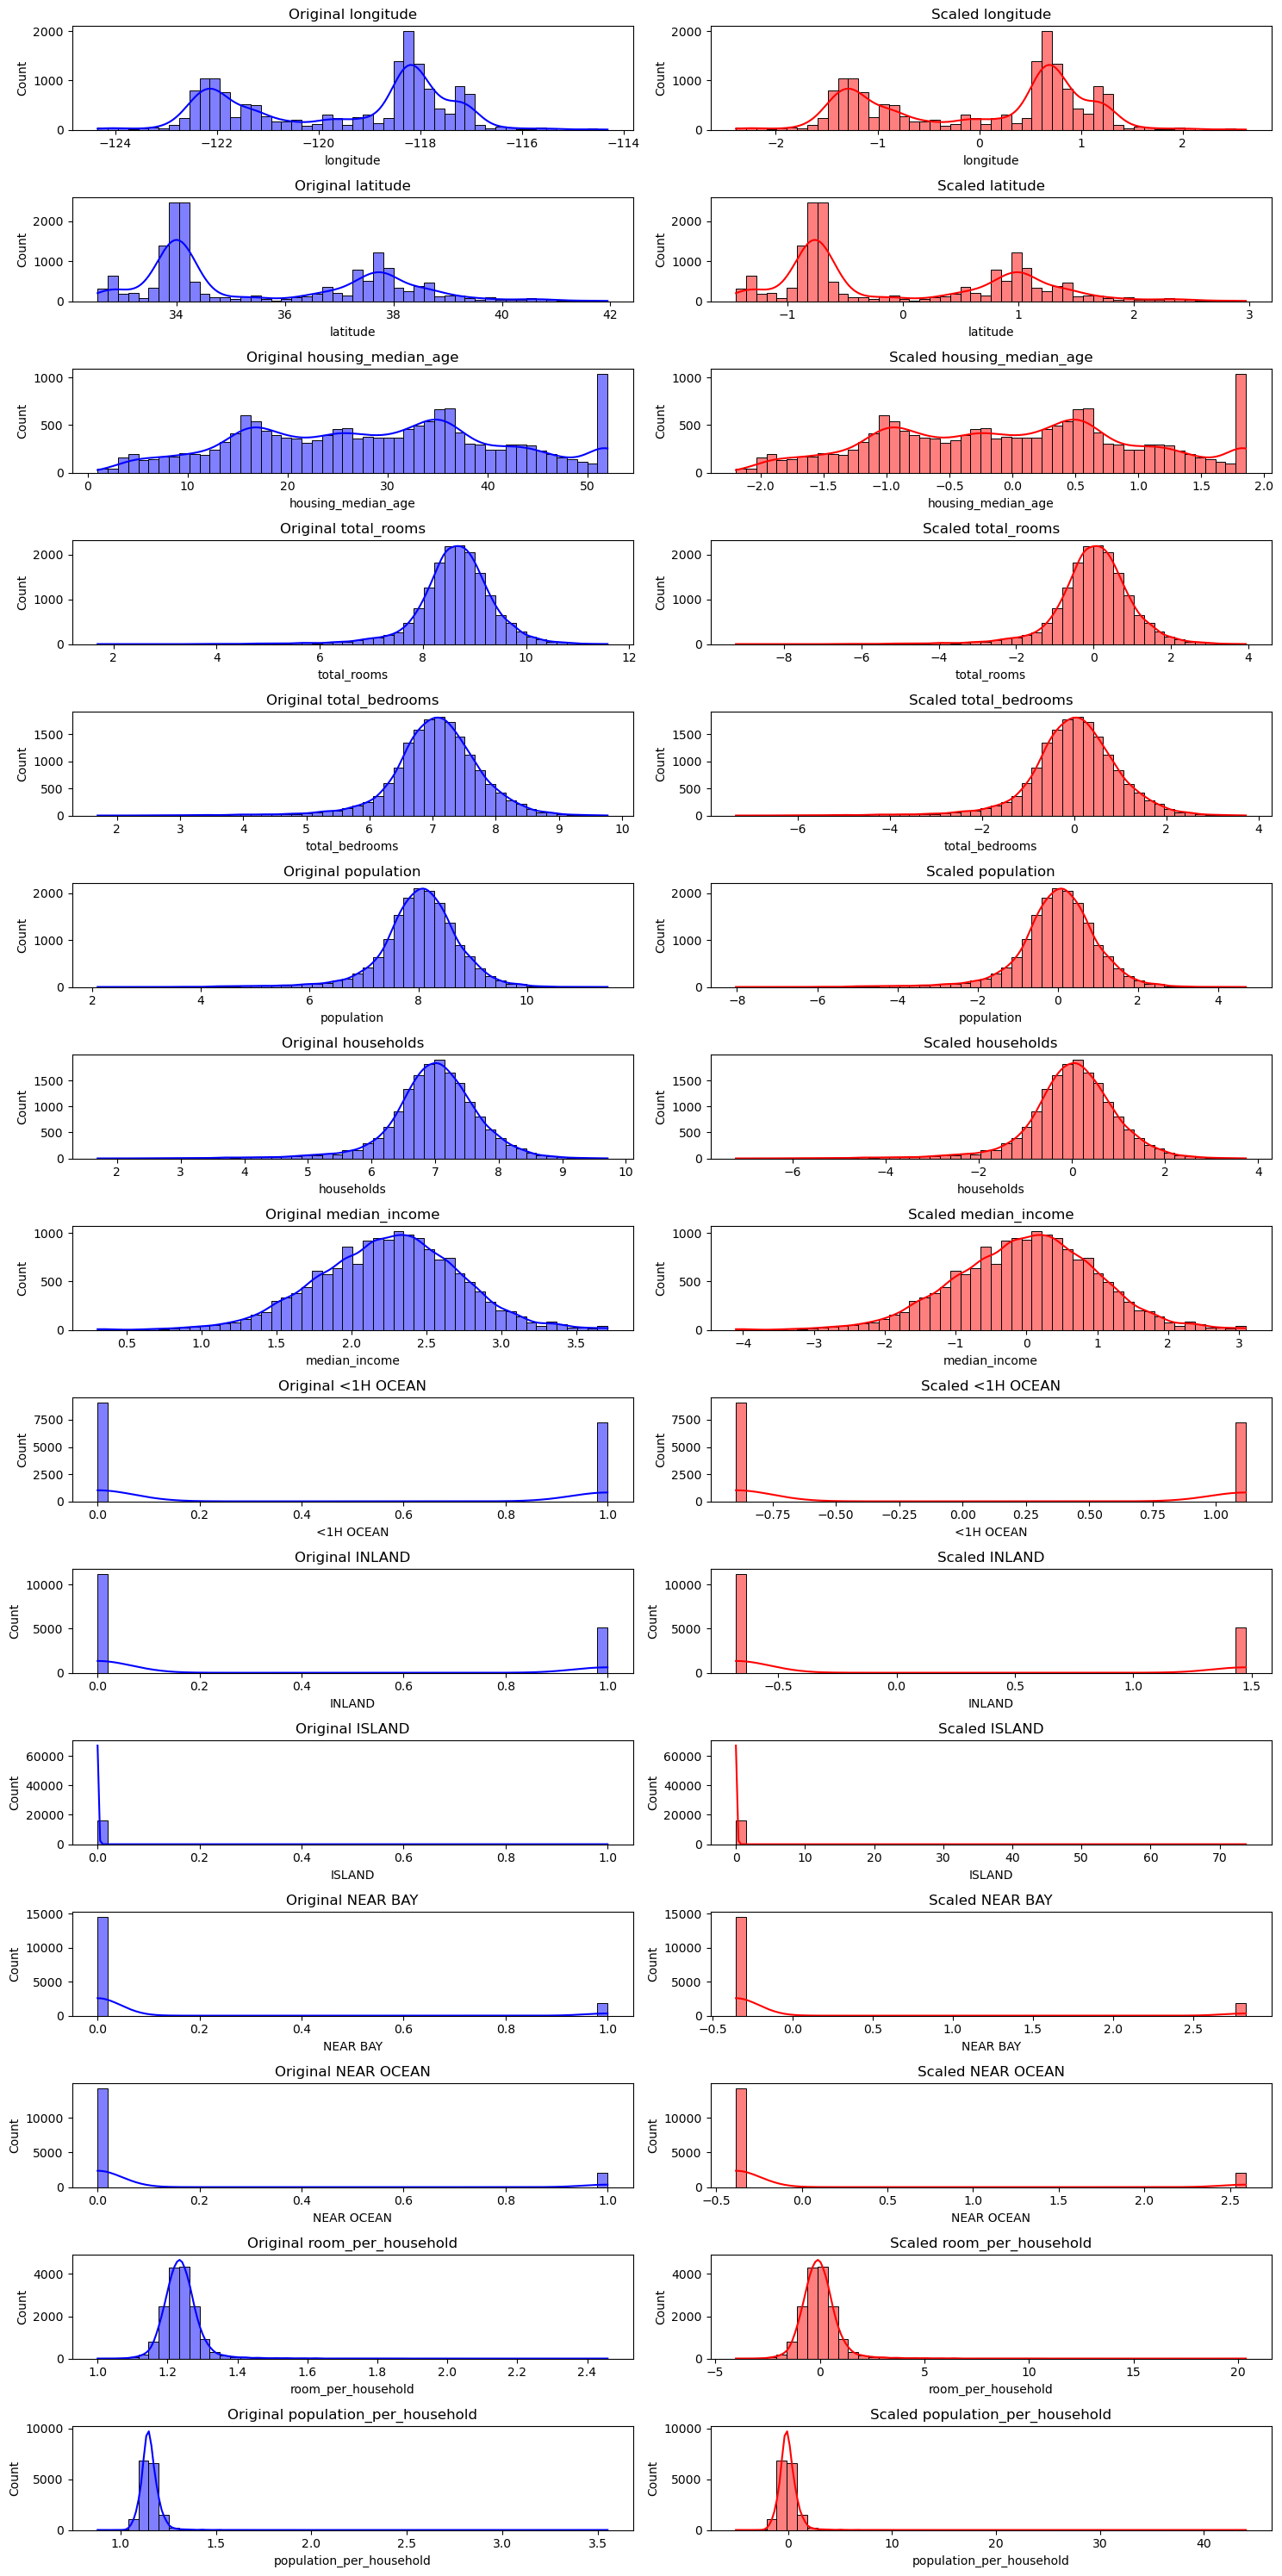

In [64]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Plot histograms before and after scaling
fig, axes = plt.subplots(nrows=len(X.columns), ncols=2, figsize=(15, 30))
for i, col in enumerate(X.columns):
    sns.histplot(X_train_df[col], bins=50, ax=axes[i, 0], color='blue', kde=True)
    axes[i, 0].set_title(f'Original {col}')
    
    sns.histplot(X_train_scaled_df[col], bins=50, ax=axes[i, 1], color='red', kde=True)
    axes[i, 1].set_title(f'Scaled {col}')

plt.tight_layout()
plt.show()

In [65]:

model = LinearRegression()

model.fit(X_train_scaled, y_train)

model.score(X_test_scaled, y_test)


0.6071794539025701

Since the score is almost identical, we can:
- remove variables that have no correlation to our target variable,
- apply regularization.


Both of these are done by Lasso.

### Deleting selected features

<AxesSubplot: >

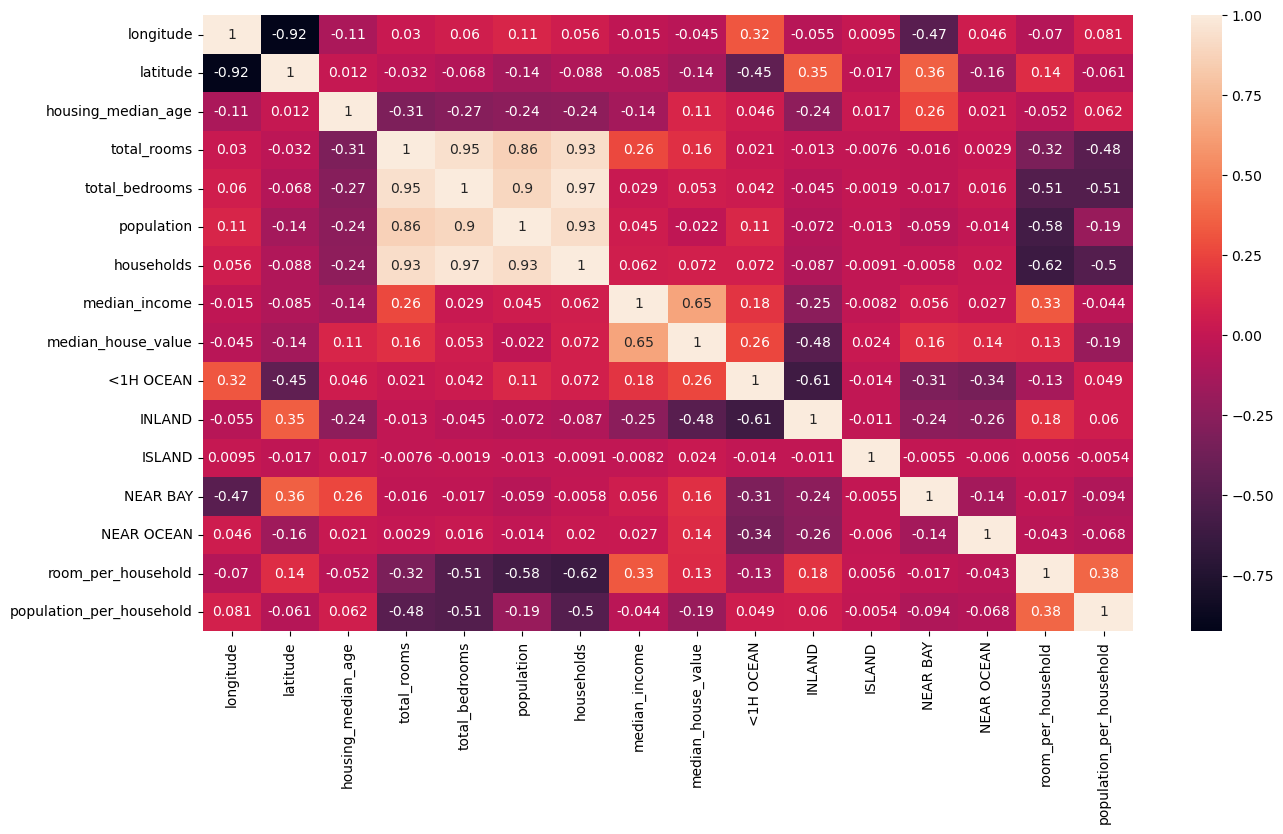

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

We can see that the longitude, ISLAND, households, population, total_bedrooms variables alone, do not really show much correlation to the target variable. Let's apply Lasso's regression.

In [67]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Lasso(max_iter=10000) # we will set the max_iter to 10000 since the default value is 1000 and it is not enough for the model to converge

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

model.score(X_test_scaled, y_test)

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.801e+10, tolerance: 2.179e+10
  model = cd_fast.enet_coordinate_descent(


0.6278018528076217

It looks like the model's performance didn't improve much. Let's see what the coefficients look like.

In [68]:
coef_df = pd.DataFrame({'Feature':X.columns, 'Coef':model.coef_})
coef_df

,Feature,Coef
0,longitude,-62747.590839
1,latitude,-65622.404861
2,housing_median_age,13340.266286
3,total_rooms,-3466.831465
4,total_bedrooms,49987.532663
5,population,-106396.715410
6,households,65105.804533
7,median_income,68716.627990
8,<1H OCEAN,2697.592170
9,INLAND,-14270.146901


## Linearity of Data
Even after trying different things, we can see that the model's performance doesn't improve much. Let's analyze why is this.

When using a linear regression model we assume that the target variable has a linear relationship with the independent variables. Let's check this!

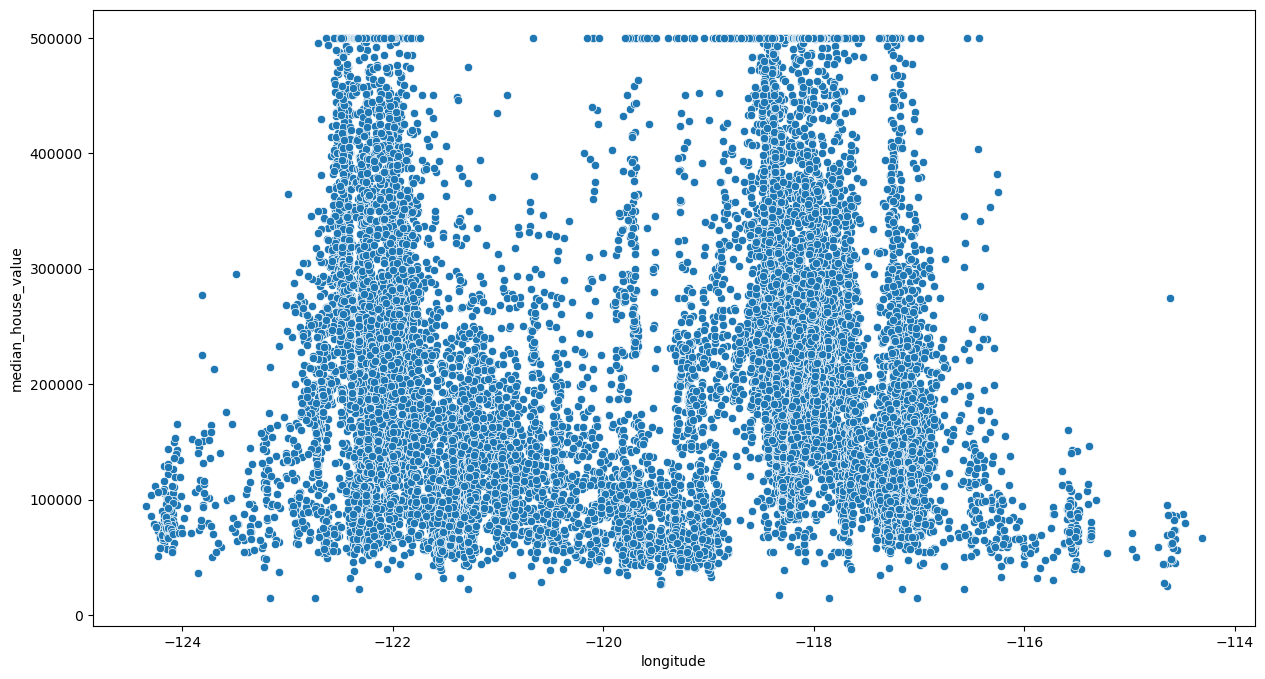

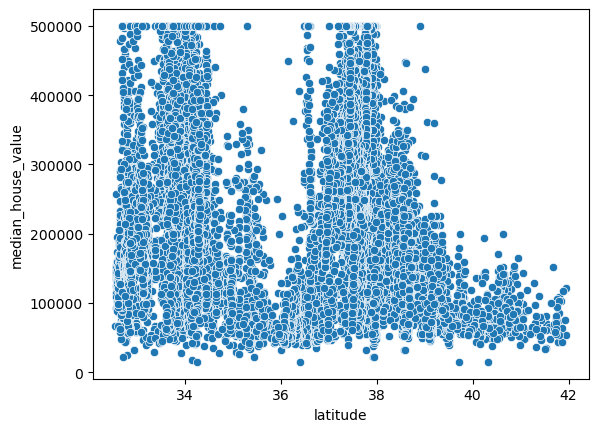

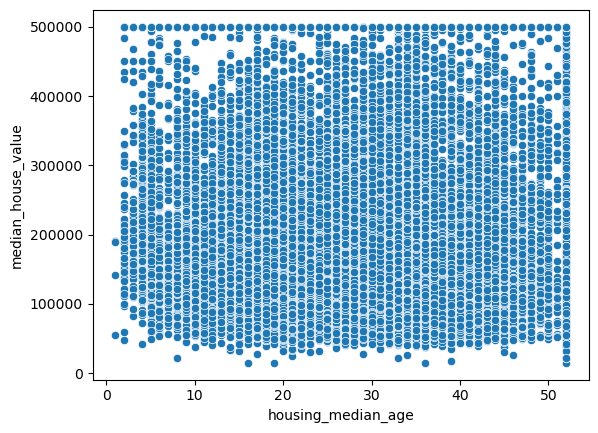

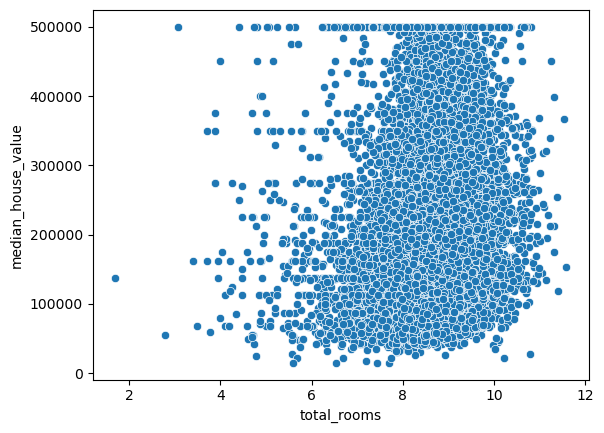

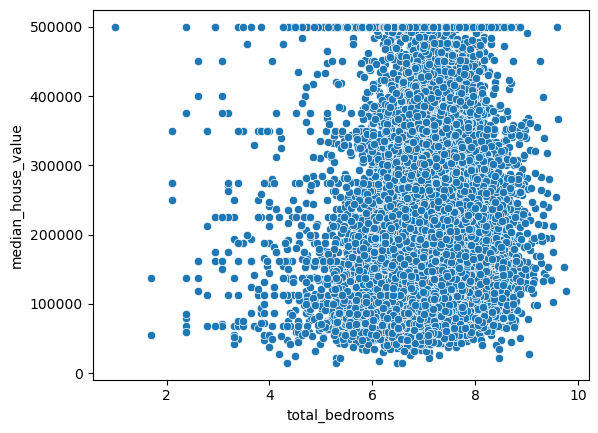

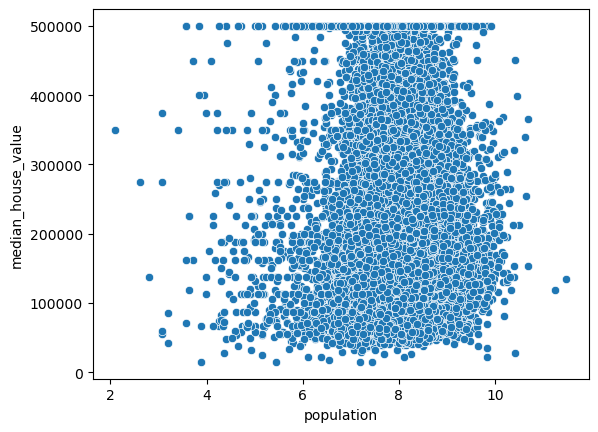

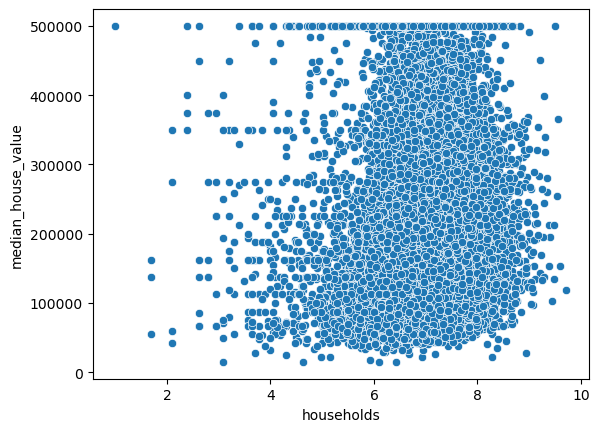

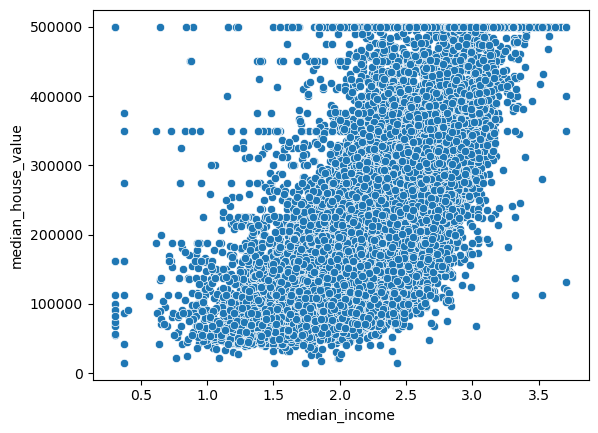

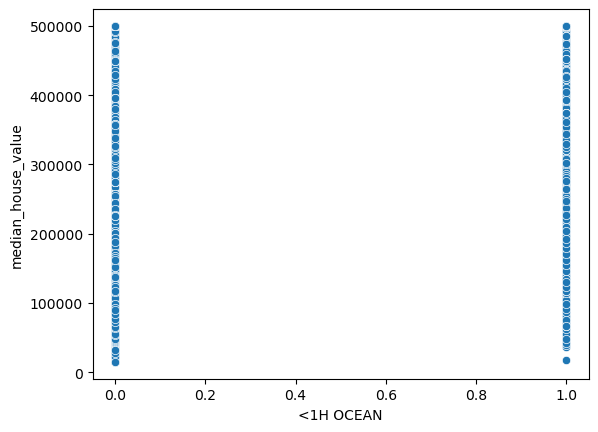

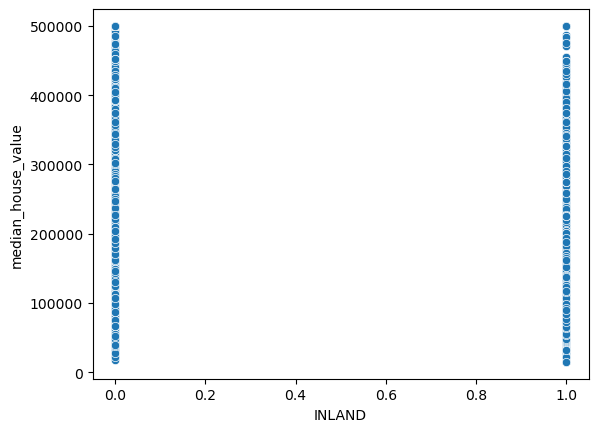

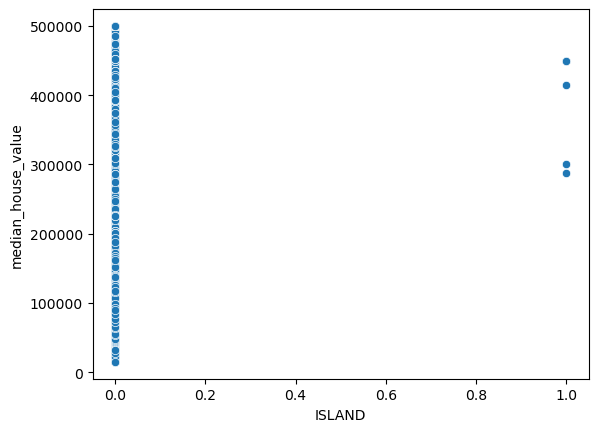

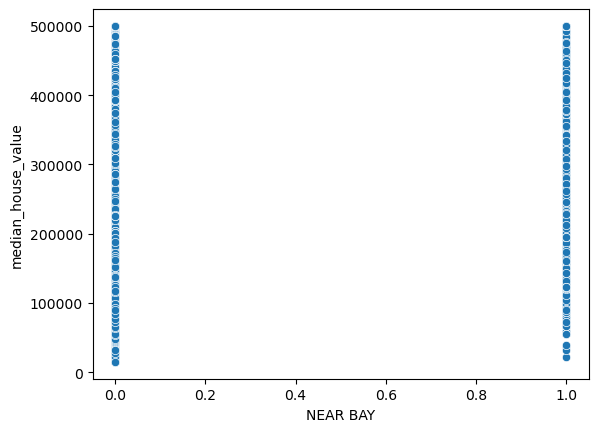

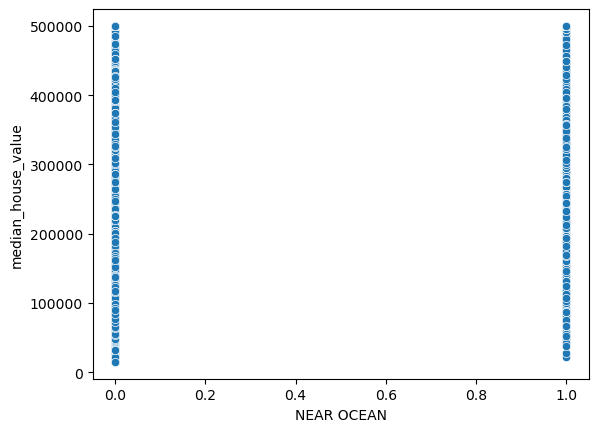

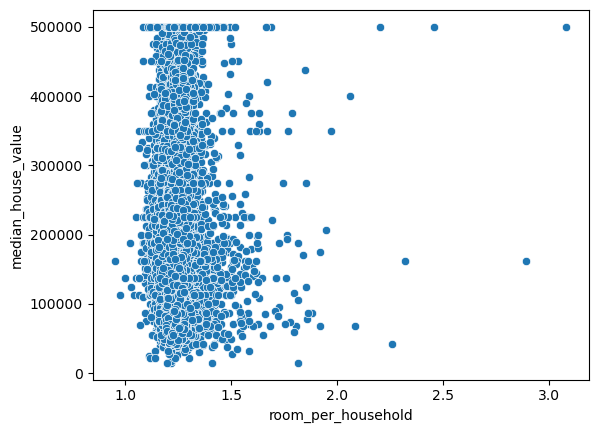

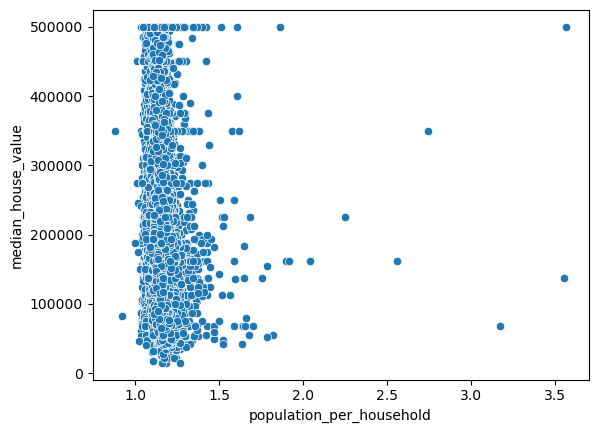

In [80]:
# let's go over each variable separately and check the linearity relationship with the target variable
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'room_per_household', 'population_per_household']
plt.figure(figsize=(15,8))
data_full = X.copy()
data_full['median_house_value'] = y
for feature in features:
    sns.scatterplot(x=feature, y='median_house_value', data=data_full)
    plt.show()


None of the variables have a linear relationship with the target feature, that means that we have to try a different model.